# 1. Introduction

Welcome to your third assignment. In this assignment, you will build a deep neural network step by step. In this notebook, you will implement all the functions required to build a neural network.

After finishing this assignment, you will have a deeper understanding of the process of training a deep neural network, which only consists of three steps: forward propagation, backward propagation and update.

# 2. Important notice

## 2.1 Packages
All the packages that you need to finish this assignment are listed below.
*   numpy : the fundamental package for scientific computing with Python.
*   matplotlib : a comprehensive library for creating static, animated, and interactive visualizations in Python.
*   math : Python has a built-in module that you can use for mathematical tasks.
*   sklearn.metrics: we use this to compute the f1 score
*   from google.colab import drive: used to access data in your google drive

⚠️ **WARNING** ⚠️:
*   Please do not import any other packages.
*   np.random.seed(1) is used to keep all the random function calls consistent. It will help us grade your work. Please don't change the seed.

## 2.2 Todo
```
### START CODE HERE ### (≈ n lines of code)
...
### END CODE HERE ###
```
❗ **Important** ❗: Please do not change the code outside this code bracket in the first part.

### Common Notation
* $C$: number of classes
* $n$: number of samples
* $f^{[l]}$: the dimension of outputs in layer $l$, but $f^{[0]}$ is the input dimension
* $Z^{[l]} = A^{[l-1]}W^{[l]} + b^{[l]}$
    * $Z^{[l]}$: the output of layer $l$ in the shape $(n, f^{[l]})$
    * $A^{[l]}$: the activation of $Z^{[l]}$ in the shape $(n, f^{[l]})$, but $A^{[0]}$ is input $X$
    * $W^{[l]}$: the weight in layer $l$ in the shape $(f^{[l-1]}, f^{[l]})$
    * $b^{[l]}$: the bias in layer $l$ in the shape $(1, f^{[l]})$


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
from sklearn.metrics import f1_score

outputs = {}

# 3. Neural network
In this section, you will need to implement a deep neural network from scratch all by yourself. If you are familiar with deep learning library, such as Tensorflow or PyTorch, it may seems easy for you. But if you don't, don't worry because we will guide you step by step. All you need to do is to follow the instructions and understand how each part works.

As mentioned before, the process of training a deep neural network is composed of three steps: forward propagation, backward propagation, and update, so all the to-do in this section will be related to these three steps.

## 3.1 Implement a linear layer (10%)
First, we will start by implementing one of the most commonly used layers in the deep neural network, called the dense layer. The dense layer is a linear layer applying a linear transformation to the incoming data:
$Z = AW + b$, where $W$ and $b$ are the weight and bias.

**Note**: Dense layers, also known as Fully-connected layers, connect every input neuron to every output neuron and are commonly used in neural networks.


In [2]:
class Dense():
    def __init__(self, n_x, n_y, seed=1):
        self.n_x = n_x
        self.n_y = n_y
        self.seed = seed
        self.initialize_parameters()

    def initialize_parameters(self):
        """
        Argument:
        self.n_x -- size of the input layer
        self.n_y -- size of the output layer
        self.parameters -- python dictionary containing your parameters:
                           W -- weight matrix of shape (n_x, n_y)
                           b -- bias vector of shape (1, n_y)
        """
        sd = np.sqrt(6.0 / (self.n_x + self.n_y))
        np.random.seed(self.seed)
        W = np.random.uniform(-sd, sd, (self.n_y, self.n_x)).T      # the transpose here is just for the code to be compatible with the old codes
        b = np.zeros((1, self.n_y))

        assert(W.shape == (self.n_x, self.n_y))
        assert(b.shape == (1, self.n_y))

        self.parameters = {"W": W, "b": b}

    def forward(self, A):
        """
        Implement the linear part of a layer's forward propagation.

        Arguments:
        A -- activations from previous layer (or input data) with the shape (n, f^[l-1])
        self.cache -- a python tuple containing "A", "W" and "b" ; stored for computing the backward pass efficiently

        Returns:
        Z -- the input of the activation function, also called pre-activation parameter with the shape (n, f^[l])
        """

        # GRADED FUNCTION: linear_forward
        ### START CODE HERE ### (≈ 2 line of code)
        Z = np.matmul(A, self.parameters['W']) + self.parameters['b']
        self.cache = (A, self.parameters['W'], self.parameters['b'])
        ### END CODE HERE ###

        assert(Z.shape == (A.shape[0], self.parameters["W"].shape[1]))

        return Z

    def backward(self, dZ):
        """
        Implement the linear portion of backward propagation for a single layer (layer l)

        Arguments:
        dZ -- Gradient of the loss with respect to the linear output (of current layer l), same shape as Z
        self.cache -- tuple of values (A_prev, W, b) coming from the forward propagation in the current layer
        self.dW -- Gradient of the loss with respect to W (current layer l), same shape as W
        self.db -- Gradient of the loss with respect to b (current layer l), same shape as b

        Returns:
        dA_prev -- Gradient of the loss with respect to the activation (of the previous layer l-1), same shape as A_prev

        """
        A_prev, W, b = self.cache
        m = A_prev.shape[0]

        # GRADED FUNCTION: linear_backward
        ### START CODE HERE ### (≈ 3 lines of code)
        self.dW = 1/m * np.matmul(A_prev.T, dZ) 
        self.db = np.array([1/m * np.sum(dZ, axis=0)])
        dA_prev = np.matmul(dZ, W.T)
        ### END CODE HERE ###

        assert (dA_prev.shape == A_prev.shape)
        assert (self.dW.shape == self.parameters["W"].shape)
        assert (self.db.shape == self.parameters["b"].shape)

        return dA_prev

    def update(self, learning_rate):
        """
        Update parameters using gradient descent

        Arguments:
        learning rate -- step size
        """

        # GRADED FUNCTION: linear_update_parameters
        ### START CODE HERE ### (≈ 2 lines of code)
        self.parameters["W"] = self.parameters["W"] - (learning_rate * self.dW)
        self.parameters["b"] = self.parameters["b"] - (learning_rate * self.db)
        ### END CODE HERE ###

## 3.2. Activation function layer (25%)

In this section, you will need to implement activation function layers. There are many activation functions, such as sigmoid function, softmax function, ReLU function and etc.



In [3]:
class Activation():
    def __init__(self, activation_function, loss_function, alpha=None, gamma=None):
        self.activation_function = activation_function
        self.loss_function = loss_function
        self.alpha = alpha
        self.gamma = gamma

    def forward(self, Z):
        if self.activation_function == "sigmoid":
            """
            Implements the sigmoid activation in numpy

            Arguments:
            Z -- numpy array of any shape
            self.cache -- stores Z as well, useful during backpropagation

            Returns:
            A -- output of sigmoid(z), same shape as Z
            """

            # GRADED FUNCTION: sigmoid_forward
            ### START CODE HERE ### (≈ 8 lines of code)
            A = np.zeros(Z.shape)
            for i in range(Z.shape[0]):
                for j in range(Z.shape[1]):
                    if Z[i][j] >= 0:
                        A[i][j] = 1 / (1 + np.exp(-Z[i][j])) 
                    else:
                        A[i][j] = np.exp(Z[i][j]) / (1 + np.exp(Z[i][j]))
            self.cache = Z
            ### END CODE HERE ###

            return A
        elif self.activation_function == "relu":
            """
            Implement the RELU function in numpy
            Arguments:
            Z -- numpy array of any shape
            self.cache -- stores Z as well, useful during backpropagation
            Returns:
            A -- output of relu(z), same shape as Z

            """

            # GRADED FUNCTION: relu_forward
            ### START CODE HERE ### (≈ 2 lines of code)
            A = np.maximum(Z, 0)
            self.cache = Z
            ### END CODE HERE ###

            assert(A.shape == Z.shape)

            return A
        elif self.activation_function == "softmax":
            """
            Implements the softmax activation in numpy

            Arguments:
            Z -- np.array with shape (n, C)
            self.cache -- stores Z as well, useful during backpropagation

            Returns:
            A -- output of softmax(z), same shape as Z
            """

            # GRADED FUNCTION: softmax_forward
            ### START CODE HERE ### (≈ 3 lines of code)
            b = np.max(Z, axis=1, keepdims=True)
            A = (np.exp(Z - b)) / np.sum(np.exp(Z - b), axis=1, keepdims=True)
            self.cache = Z
            ### END CODE HERE ###

            return A
        else:
            assert 0, f"you're using undefined activation function {self.activation_function}"


    def backward(self, dA=None, Y=None):
        if self.activation_function == "sigmoid":
            """
            Implement the backward propagation for a single SIGMOID unit.
            Arguments:
            dA -- post-activation gradient, of any shape
            self.cache -- 'Z' where we store for computing backward propagation efficiently
            Returns:
            dZ -- Gradient of the loss with respect to Z
            """

            # GRADED FUNCTION: sigmoid_backward
            ### START CODE HERE ### (≈ 9 lines of code)
            Z = self.cache
            dZ = np.zeros(Z.shape)
            for i in range(Z.shape[0]):
                for j in range(Z.shape[1]):
                    if Z[i][j] >= 0:
                        sig = 1 / (1 + np.exp(-Z[i][j])) 
                        dZ[i][j] = sig * (1 - sig) * dA[i][j]
                    else:
                        sig = np.exp(Z[i][j]) / (1 + np.exp(Z[i][j]))
                        dZ[i][j] = sig * (1 - sig) * dA[i][j]
            ### END CODE HERE ###

            assert (dZ.shape == Z.shape)

            return dZ

        elif self.activation_function == "relu":
            """
            Implement the backward propagation for a single RELU unit.
            Arguments:
            dA -- post-activation gradient, of any shape
            self.cache -- 'Z' where we store for computing backward propagation efficiently
            Returns:
            dZ -- Gradient of the loss with respect to Z
            """

            # GRADED FUNCTION: relu_backward
            ### START CODE HERE ### (≈ 3 lines of code)
            Z = self.cache
            dg = np.where(Z > 0, 1, 0)
            dZ = dA * dg
            ### END CODE HERE ###

            assert (dZ.shape == Z.shape)

            return dZ

        elif self.activation_function == "softmax" and self.loss_function == 'cross_entropy':
            """
            Implement the backward propagation for a [SOFTMAX->CCE LOSS] unit.
            Arguments:
            Y -- true "label" vector (one hot vector, for example: [1,0,0] represents rock, [0,1,0] represents paper, [0,0,1] represents scissors
                                      in a Rock-Paper-Scissors, shape: (n, C)
            self.cache -- 'Z' where we store for computing backward propagation efficiently
            Returns:
            dZ -- Gradient of the cost with respect to Z
            """

            # GRADED FUNCTION: softmax_CCE_backward
            ### START CODE HERE ### (≈ 3 lines of code)
            Z = self.cache
            s = (np.exp(Z)) / np.sum(np.exp(Z), axis=1, keepdims=True)
            dZ = s - Y
            ### END CODE HERE ###

            assert (dZ.shape == self.cache.shape)

            return dZ
        elif self.activation_function == "softmax" and self.loss_function == 'focal_loss':
            """
            Implement the backward propagation for a [SOFTMAX->FOCAL LOSS] unit.
            Arguments:
            Y -- true "label" vector (one hot vector, for example: [1,0,0] represents rock, [0,1,0] represents paper, [0,0,1] represents scissors
                                      in a Rock-Paper-Scissors, shape: (n, C)
            self.cache -- 'Z' where we store for computing backward propagation efficiently
            Returns:
            dZ -- Gradient of the cost with respect to Z
            alpha -- weighting factors correspond to each class, shape: (C,)
            gamma -- modulating factor, a float
            """

            # GRADED FUNCTION: softmax_focalLoss_backward
            ## START CODE HERE ### (≈ 10 lines of code)
            Z = self.cache
            p = (np.exp(Z)) / np.sum(np.exp(Z), axis=1, keepdims=True)
            p_it = np.sum(p * Y, axis=1)
            dZ = np.zeros(Z.shape)
            alpha_t = np.sum(self.alpha * Y, axis=1, keepdims=True)
            for i in range(Z.shape[0]):
                for j in range(Z.shape[1]):
                    if Y[i][j] == 1:
                        dZ[i][j] = alpha_t[i] * ((self.gamma * np.power(1 - p_it[i], self.gamma - 1) * np.log(p_it[i] + 1e-5) * (p[i][j] - np.power(p[i][j], 2))) 
                                    - (np.power(1 - p_it[i], self.gamma) * (1 - p_it[i])))
                    else:
                        dZ[i][j] = alpha_t[i] * ((self.gamma * np.power(1 - p_it[i], self.gamma - 1) * np.log(p_it[i] + 1e-5) * (-p[i][j] * (p_it[i]))) 
                                    - (np.power(1 - p_it[i], self.gamma) * (-p[i][j])))
            ## END CODE HERE ###

            assert (dZ.shape == self.cache.shape)

            return dZ

## 3.3. Model (10%)
Alright, now you have all the tools that are needed to build a model. Let's get started! 😀



In [4]:
class Model():
    def __init__(self, units, activation_functions, loss_function, alpha=None, gamma=None):
        self.units = units
        self.activation_functions = activation_functions
        self.loss_function = loss_function
        self.alpha = alpha
        self.gamma = gamma
        self.initialize_parameters()

    def initialize_parameters(self):
        """
        Arguments:
        self.units -- number of nodes/units for each layer, starting from the input dimension and ending with the output dimension (i.e., [4, 4, 1])
        self.activation_functions -- activation functions used in each layer (i.e, ["relu", "sigmoid"])
        self.loss_function -- ["cross_entropy", "focal_loss"]
        self.alpha -- weighting factors used by focal loss correspond to each class, shape: (C,)
        self.gamma -- a float, used by focal loss
        """
        self.linear = []        # a list to store the dense layers when initializing the model
        self.activation = []    # a list to store the activation function layers when initializing the model

        for i in range(len(self.units)-1):
            dense = Dense(self.units[i], self.units[i+1], i)
            self.linear.append(dense)

        for i in range(len(self.activation_functions)):
            self.activation.append(Activation(self.activation_functions[i], self.loss_function, self.alpha, self.gamma))

    def forward(self, X):
        """
        Arguments:
        X -- input data: shape (n, f)

        Returns:
        A -- output of L-layer neural network, probability vector corresponding to your label predictions, shape (n, C)
        """
        A = X

        # GRADED FUNCTION: model_forward
        ### START CODE HERE ### (≈ 4 lines of code)
        for i in range(len(self.units) - 1):
            Z = self.linear[i].forward(A)
            A = self.activation[i].forward(Z)
        ### END CODE HERE ###

        return A

    def backward(self, AL=None, Y=None):
        """
        Arguments:
        For multi-class classification,
        AL -- output of L-layer neural network, probability vector corresponding to your label predictions, shape (n, C)
        Y -- true "label" vector (one hot vector, for example: [1,0,0] represents rock, [0,1,0] represents paper, [0,0,1] represents scissors
                                      in a Rock-Paper-Scissors, shape: (n, C)

        Returns:
        dA_prev -- post-activation gradient
        """

        L = len(self.linear)
        C = Y.shape[1]

        # assertions
        warning = 'Warning: only the following 4 combinations are allowed! \n \
                    1. binary classification: sigmoid + cross_entropy) \n \
                    2. binary classification: softmax + focal_loss) \n \
                    3. multi-class classification: softmax + cross_entropy) \n \
                    4. multi-class classification: softmax + focal_loss)'
        assert self.loss_function in ["cross_entropy", "focal_loss"], "you're using undefined loss function!"
        if Y.shape[1] <= 2:                                 # in binary classification
            if self.loss_function == "cross_entropy":
                assert self.activation_functions[-1] == 'sigmoid', warning
                assert self.units[-1] == 1, "you should set last dim to 1 when using sigmoid + cross_entropy in binary classification!"
            elif self.loss_function  == "focal_loss":
                assert self.activation_functions[-1] == 'softmax', warning
                assert self.units[-1] == 2, "you should set last dim to 2 when using softmax + focal_loss in binary classification!"
        else:                                               # in multi-class classification
            assert self.activation_functions[-1] == 'softmax', warning
            assert self.units[-1] == Y.shape[1], f"you should set last dim to {Y.shape[1]}(the number of classes) in multi-class classification!"

        # GRADED FUNCTION: model_backward
        ### START CODE HERE ### (≈ 20 lines of code)

        if self.activation_functions[-1] == "sigmoid":
            if self.loss_function == 'cross_entropy':
                # Initializing the backpropagation
                dAL = -(np.divide(Y, AL + 1e-5) - np.divide(1 - Y, 1 - AL + 1e-5))

                # Lth layer (SIGMOID -> LINEAR) gradients. Inputs: "dAL". Outputs: "dA_prev"
                dZ = self.activation[-1].backward(dA=dAL, Y=Y)
                dA_prev = self.linear[-1].backward(dZ)
        elif self.activation_functions[-1] == "softmax":
            # Initializing the backpropagation
            dZ = self.activation[-1].backward(Y=Y)

            # Lth layer (LINEAR) gradients. Inputs: "dZ". Outputs: "dA_prev"
            dA_prev = self.linear[-1].backward(dZ)

        # Loop from l=L-2 to l=0
        # lth layer: (RELU -> LINEAR) gradients.
        # Inputs: "dA_prev". Outputs: "dA_prev"
        for i in range(L-2, -1, -1):
            dZ = self.activation[i].backward(dA=dA_prev, Y=Y)
            dA_prev = self.linear[i].backward(dZ)
        ### END CODE HERE ###

        return dA_prev

    def update(self, learning_rate):
        """
        Arguments:
        learning_rate -- step size
        """

        L = len(self.linear)

        # GRADED FUNCTION: model_update_parameters
        ### START CODE HERE ### (≈ 2 lines of code)
        for i in range(L):
            self.linear[i].parameters["W"] = self.linear[i].parameters["W"] - (learning_rate * self.linear[i].dW)
            self.linear[i].parameters["b"] = self.linear[i].parameters["b"] - (learning_rate * self.linear[i].db)
        ### END CODE HERE ###

# 4. Loss function (15%)
In this section, you will implement the loss function. We use binary cross-entropy loss for binary classification and categorical cross-entropy loss for multi-class classification. You need to compute the loss, because you want to check if your model is actually learning. Cross-entropy loss is minimized, where smaller values represent a better model than larger values. A model that predicts perfect probabilities has a cross entropy or log loss of 0.0.



## 4.1. Binary cross-entropy loss (5%)
**Exercise**: Compute the binary cross-entropy loss $L$, using the following formula:  $$-\frac{1}{n} \sum\limits_{i = 1}^{n} (y^{(i)}\log\left(a^{[L] (i)}+ϵ\right) + (1-y^{(i)})\log\left(1- a^{[L](i)}+ϵ\right)), where\ ϵ=1e-5$$

In [5]:
# GRADED FUNCTION: compute_BCE_loss

def compute_BCE_loss(AL, Y):
    """
    Implement the binary cross-entropy loss function using the above formula.

    Arguments:
    AL -- probability vector corresponding to your label predictions, shape (n, 1)
    Y -- true "label" vector (for example: containing 0 if non-cat, 1 if cat), shape (n, 1)

    Returns:
    loss -- binary cross-entropy loss
    """

    n = Y.shape[0]

    # Compute loss from aL and y.
    ### START CODE HERE ### (≈ 1 line of code)
    loss = -1/n * np.sum(Y * np.log(AL + 1e-5) + (1 - Y) * np.log(1 - AL + 1e-5))
    ### END CODE HERE ###

    loss = np.squeeze(loss)      # To make sure your loss's shape is what we expect (e.g. this turns [[17]] into 17).
    assert(loss.shape == ())

    return loss

## 4.2. Categorical cross-entropy loss (CCE) (5%)
**Exercise**:
Compute the categorical cross-entropy loss $L$, using the following formula: $$-\frac{1}{n} \sum\limits_{i = 1}^{n} (y^{(i)}\log\left(a^{[L] (i)}+ϵ\right)),\ ϵ = 1e-5$$







In [6]:
# GRADED FUNCTION: compute_CCE_loss

def compute_CCE_loss(AL, Y):
    """
    Implement the categorical cross-entropy loss function using the above formula.

    Arguments:
    AL -- probability vector corresponding to your label predictions, shape (n, C)
    Y -- true "label" vector (one hot vector, for example: [1,0,0] represents rock, [0,1,0] represents paper, [0,0,1] represents scissors
                                      in a Rock-Paper-Scissors, shape: (n, C)

    Returns:
    loss -- categorical cross-entropy loss
    """

    n = Y.shape[0]

    # Compute loss from aL and y.
    ### START CODE HERE ### (≈ 1 line of code)
    loss = -1/n * np.sum(Y * np.log(AL + 1e-5))
    ### END CODE HERE ###

    loss = np.squeeze(loss)      # To make sure your loss's shape is what we expect (e.g. this turns [[17]] into 17).
    assert(loss.shape == ())

    return loss

## 4.3. Focal loss (5%)
**Exercise**:
If we think of the CCE loss elementwisely, the above equation can be re-written in the form below:
$$-\frac{1}{n} \sum\limits_{i = 1}^{n} ( \sum\limits_{j = 1}^{c} (y_{ij}\log\left(a^{[L]}_{ij}+ϵ\right))), \ ϵ = 1e-5$$

To handle the imbalance dataset, we can use the focal loss, which adds the weighting factor $\alpha$ and the modulating term $(1-a^{[L]}_{ij})^\gamma$. To compute the focal loss, you can use the following equation:
$$-\frac{1}{n} \sum\limits_{i = 1}^{n} (\sum\limits_{j = 1}^{c} (\alpha_{j} (1-a^{[L]}_{ij})^\gamma * y_{ij}\log\left(a^{[L]}_{ij}+ϵ\right))),$$
where
* $\ ϵ = 1e-5$
* $\alpha$ is the weighting factors in the shape $(c,)$, where ${\alpha}_i$ corresponds to the class $i$
* $\gamma$ is a modulating factor
* $n$ is the number of examples
* $c$ is the number of classes

Since $y_i$ would be a one-hot vector, we can further simplify the equation to
$$
\text{Focal Loss} =
-\frac{1}{n} \sum_{i=1}^{n} \alpha_t (1 - p_{it})^\gamma \log(p_{it}+ϵ)
$$
where
* $p$: $a^{[L]}$
* $p_{ij}$: for the $i$th example, the predicted probability for the $j$th class
* $p_{it}$: for the $i$th example, the predicted probability of the true label. (eg. Suppose a predicted probability for the $i$th example in 3-class classification is $[0.1, 0.4, 0.5]$ and the true label is $[0, 1, 0]$, then the $p_{it}$ is $0.4$)
* $\alpha_{t}$: the $\alpha$ correspond to the true label. (eg. With the above example, if your $\alpha$ is $[1,2,3]$, then $\alpha_{t} = 2$)

**Note**: Since this equation computes the focal loss elementwisely, you can try to make it in the matrix form to speed up the computation!

In [7]:
def compute_focal_loss(AL, Y, alpha, gamma):

    # Compute loss from aL and y.
    ### START CODE HERE ### (10 line of code)
    n = Y.shape[0]
    loss = -1/n * np.sum(np.sum((alpha * Y) * np.power(1 - (AL * Y), gamma) * np.log((AL * Y) + 1e-5), axis=1))
    ### END CODE HERE ###

    loss = np.squeeze(loss)
    assert(loss.shape == ())

    return loss

# Basic implementation (binary classification) (20%)

Congratulations on implementing all the functions by yourself. You've done an incredible job! 👏

Now, you have all the tools necessary to begin the classification. In this section, you'll build a binary classifier using the functions you previously wrote. Our goal is to use some patients' health information and predict whether their condition is worse than a given threshold after a period of time. The features have been preprocessed using min-max normalization and the data has been shuffled.

**Exercise**: Implement a binary classifier and tune hyperparameter.

**Instruction**:
* Use the functions you had previously written.
* You can try these two combinations for your last activation + loss function
    1. sigmoid + cross_entropy
    2. softmax + focal_loss
    
**Note**: More commonly, we set the output dimension to 1 and use the sigmoid function for binary classification. However, for simplicity in implementing focal loss, we treat binary classification as a multi-class classification. As a result, you first need to transform 'y' from a single label to a one-hot label. (eg.[[1], [0], [1], [0]] -> [[0, 1], [1, 0], [0, 1], [1, 0]]) Secondly, you must set your output dimension to 2 when using focal loss.



## Helper function

In [8]:
def predict(x, y_true, model):
    """
    This function is used to predict the results of a  L-layer neural network.

    Arguments:
    x -- data set of examples you would like to label
    model -- trained model

    Returns:
    y_pred -- predictions for the given dataset X
    """

    n = x.shape[0]

    # Forward propagation
    y_pred = model.forward(x)

    # this transform the output and label of binary classification when using sigmoid + cross entropy for evaluation
    # eg. y_pred: [[0.8], [0.2], [0.1]] -> [[0.2, 0.8], [0.8, 0.2], [0.9, 0.1]]
    # eg. y_true: [[1], [0], [0]] -> [[0, 1], [1, 0], [1, 0]]
    if y_pred.shape[-1] == 1:
        y_pred = np.array([[1 - y[0], y[0]] for y in y_pred])
        if y_true is not None:
            y_true = np.array([[1,0] if y == 0 else [0,1] for y in y_true.reshape(-1)])

    # make y_pred/y_true become one-hot prediction result
    # eg. y_true: [[1, 0, 0], [0, 0, 1], [0, 1, 0]] -> [0, 2, 1]
    # eg. y_pred: [[0.2, 0.41, 0.39], [0.1, 0.8, 0.1], [0.1, 0.1, 0.8]] -> [1, 1, 2]
    if y_true is not None:
        y_true = np.argmax(y_true, axis=1)
    y_pred = np.argmax(y_pred, axis=1)

    if y_true is not None:
        # compute accuracy
        correct = 0
        for yt, yp in zip(y_true, y_pred):
            if yt == yp:
                correct += 1
        print(f"Accuracy: {correct/n * 100:.2f}%")

        f1_scores = f1_score(y_true, y_pred, average=None)
        print(f'f1 score for each class: {f1_scores}')
        print(f'f1_macro score: {np.mean(np.array(f1_scores)):.2f}')

    return y_pred

## Read data & train_val split

As you can see, the data distribution is imbalanced. Therefore, we can try using focal loss, which is an effective loss function designed to address imbalanced datasets. Let's delve into the the focal loss equation.
$$
\text{Focal Loss} =
- \sum_{i=1}^{n} \alpha_t (1 - p_{it})^\gamma \log(p_{it})
$$
The parameter $\alpha$ is an array of weighting factors for each class, which can be adjusted to balance the classes. The parameter $\gamma$ acts as a modulating factor, reducing the loss contribution from well-classified examples. For instance, if $p_{it} = 0.9$, indicating a $90\%$ confidence that the prediction for the $i$th example is correct, a higher $\gamma$ value will result in a lower loss. You can adjust $\alpha$ and $\gamma$ based on the data distribution shown in the plot below.

**Note**: When spliting data, you could try to plot and see if the data distribution is the same in training and validation to ensure the the correctness of your validation.

In [9]:
# from google.colab import drive
# drive.mount('/content/drive')

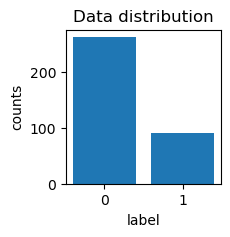

Train: x=(353, 10), y=(353, 1)
Test: x=(89, 10)
x_train: (282, 10) | y_train: (282, 1)
x_val: (71, 10) | y_val: (71, 1)


In [10]:
# load data
data = np.load('basic_data.npz')
X_train, Y_train = data["x_train"], data["y_train"]
X_test = data["x_test"]

# plot the data distribution
Y_train_1 = len(['_' for y in Y_train if y == 1])
Y_train_0 = len(['_' for y in Y_train if y == 0])
plt.figure(figsize=(2, 2))
plt.bar([0, 1], [Y_train_0, Y_train_1])
plt.title('Data distribution')
plt.xlabel('label')
plt.ylabel('counts')
plt.show()

print('Train: x=%s, y=%s' % (X_train.shape, Y_train.shape))
print('Test: x=%s' % (X_test.shape, ))

### START CODE HERE ###
# train_val split
n = X_train.shape[0]
x_train, y_train = X_train[:int(0.8*n)], Y_train[:int(0.8*n)]
x_val, y_val = X_train[int(0.8*n):], Y_train[int(0.8*n):]
### END CODE HERE ###

print("x_train: " + str(x_train.shape) + " | y_train: " + str(y_train.shape))
print("x_val: " + str(x_val.shape) + " | y_val: " + str(y_val.shape))

## Training and Evaluation

Loss after iteration 0: 0.633965


Loss after iteration 1000: 0.336708
Loss after iteration 2000: 0.331563
Loss after iteration 3000: 0.326895
Loss after iteration 4000: 0.317559
Loss after iteration 5000: 0.307287
Loss after iteration 6000: 0.298593
Loss after iteration 7000: 0.290400
Loss after iteration 8000: 0.282026
Loss after iteration 9000: 0.273362
Loss after iteration 10000: 0.263725
Loss after iteration 11000: 0.255093
Loss after iteration 12000: 0.247177
Loss after iteration 13000: 0.239530
Loss after iteration 14000: 0.232976
Loss after iteration 15000: 0.227393
Loss after iteration 16000: 0.222608
Loss after iteration 17000: 0.218254
Loss after iteration 18000: 0.214626
Loss after iteration 19000: 0.210806
Loss after iteration 20000: 0.207234
Loss after iteration 21000: 0.202960
Loss after iteration 22000: 0.199563
Loss after iteration 23000: 0.196840
Loss after iteration 24000: 0.193220


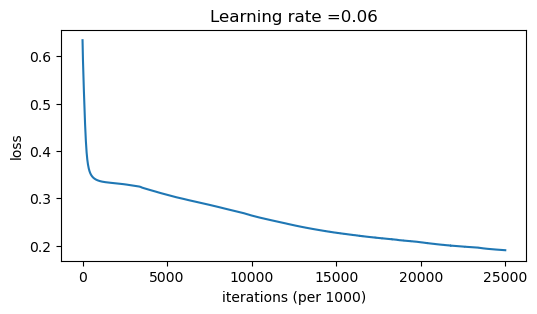

In [11]:
# GRADED CODE: binary classification
### START CODE HERE ###

loss_function = 'cross_entropy'
if loss_function == 'cross_entropy':
    layers_dims = [10, 9, 1]
    activation_fn = ["relu", "sigmoid"]
    gamma = None        # you can leave this as it is
    alpha = None        # you can leave this as it is
    y_train_processed = y_train
    y_val_processed = y_val
    assert y_train_processed.shape[-1] == 1, "see the 'Note' in the Basic implementation section"
    assert y_val_processed.shape[-1] == 1, "see the 'Note' in the Basic implementation section"
elif loss_function == 'focal_loss':
    layers_dims = [10, 5, 2]
    activation_fn = ["relu", "softmax"]
    gamma = 1
    alpha = np.array([0.5, 0.5])
    y_train_processed = np.array([[1 - y[0], y[0]] for y in y_train])
    y_val_processed = np.array([[1 - y[0], y[0]] for y in y_val])
    assert y_train_processed.shape[-1] == 2, "see the 'Note' in the Basic implementation section"
    assert y_val_processed.shape[-1] == 2, "see the 'Note' in the Basic implementation section"

learning_rate = 0.06
num_iterations = 25000
print_loss = True
print_freq = 1000
classes = 2
losses = []                         # keep track of loss
model = Model(layers_dims, activation_fn, loss_function, alpha, gamma)

# Loop (batch gradient descent)
for i in range(0, num_iterations):
    # forward
    AL = model.forward(x_train)

    # compute loss
    if loss_function == 'cross_entropy':
        loss = compute_BCE_loss(AL=AL, Y=y_train_processed)
    elif loss_function == 'focal_loss':
        loss = compute_focal_loss(AL=AL, Y=y_train_processed, alpha=alpha, gamma=gamma)

    # backward
    dA_prev = model.backward(AL=AL, Y=y_train_processed)

    # update
    model.update(learning_rate)

    losses.append(loss)
    if print_loss and i % print_freq == 0:
        print ("Loss after iteration %i: %f" %(i, loss))

# plot the loss
plt.figure(figsize=(6, 3))
plt.plot(np.squeeze(losses))
plt.ylabel('loss')
plt.xlabel(f'iterations (per {print_freq})')
plt.title("Learning rate =" + str(learning_rate))
plt.show()
### END CODE HERE ###

In [12]:
print('training------')
pred_train = predict(x_train, y_train_processed, model)
print('validation------')
pred_val = predict(x_val, y_val_processed, model)

training------
Accuracy: 92.55%
f1 score for each class: [0.95035461 0.85106383]
f1_macro score: 0.90
validation------
Accuracy: 84.51%
f1 score for each class: [0.89320388 0.71794872]
f1_macro score: 0.81


In [13]:
pred_test = predict(X_test, None, model)
outputs["basic_pred_test"] = pred_test

# Advanced implementation (multi class classification) (15%)

In this section, you need to implement a multi-class classifier using the functions you had previously written. You will create a model that can classify ten handwritten digits. The MNIST handwritten digit classification problem is a standard dataset in computer vision and deep learning. We usually use convolutional deep-learning neural networks for image classification. However, using only dense layers appears to be enough to handle this simple dataset, and this is a good way to get started with image datasets.

**Exercise**: Implement a multi-class classifier and tune hyperparameter.

**Instruction**:
*   Use the functions you had previously written.
*   Preprocess the data to match the correct input format.
*   Use mini-batch gradient descent to train the model.

**Hint**:
For data preprocessing, please be careful with the dimension of the inputs (X and y) and also note that the values of images are usually integers that fall between 0 and 255. You need to change the data type into float and scale the values between 0 and 1.

In Batch Gradient Descent, we consider all the samples for every step of Gradient Descent. But what if our dataset is huge? You will get around 33000 training samples, then to take one step, the model will have to calculate the gradients of all the 33000 samples. This does not seem an efficient way. Hence, mini-batch gradient descent is recommended to be used in this part.

## Read data & train_val split

In [14]:
# from google.colab import drive
# drive.mount('/content/drive')

Train: X=(31065, 28, 28), Y=(31065,)
Test: X=(7767, 28, 28)


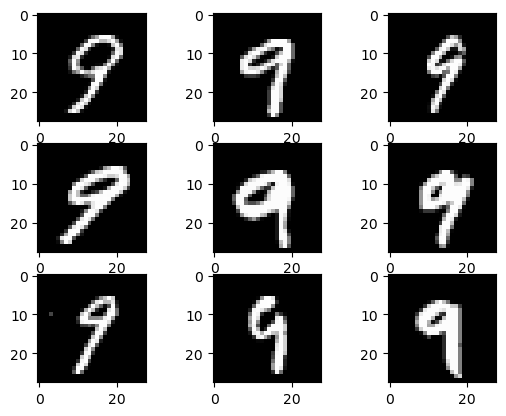

shape of X_train: (31065, 28, 28)
shape of Y_train: (31065, 10)
shape of X_test: (7767, 28, 28)

shape of X_train: (31065, 784)
shape of Y_train: (31065, 10)
shape of X_test: (7767, 784)


In [15]:
# load data
data = np.load('advanced_data.npz')
X_train = data["x_train"]
Y_train = data["y_train"]
X_test = data["x_test"]

# summarize loaded dataset
print(f'Train: X={X_train.shape}, Y={Y_train.shape}')
print(f'Test: X={X_test.shape}')
# plot first few images
for i in range(9):
	# define subplot
	plt.subplot(330 + 1 + i)
	# plot raw pixel data
	plt.imshow(X_train[i], cmap='gray', vmin=0, vmax=255)
# show the figure
plt.show()

# GRADED CODE: multi-class classification (Data preprocessing) one-hot encoding for y
### START CODE HERE ###
Y_train = np.array([[1 if i == target else 0 for i in range(10)] for target in Y_train])
### END CODE HERE ###

print("shape of X_train: " + str(X_train.shape))
print("shape of Y_train: " + str(Y_train.shape))
print("shape of X_test: " + str(X_test.shape))

# GRADED CODE: multi-class classification (Data preprocessing)	normalize x
### START CODE HERE ###
X_train = np.array([R.flatten() for R in X_train]) / 255
X_test = np.array([R.flatten() for R in X_test]) / 255
### END CODE HERE ###

print("\nshape of X_train: " + str(X_train.shape))
print("shape of Y_train: " + str(Y_train.shape))
print("shape of X_test: " + str(X_test.shape))

In [16]:
# You can split training and validation set here and visualize their distribution. (Optional)
# If not, just leave this as it is
### START CODE HERE ###
def train_test_split(X_train, Y_train):
    x_train = []
    y_train = []
    x_val = []
    y_val = []
    y_train_real = np.argmax(Y_train, axis=1)
    for i in range(10):
        index = np.where(y_train_real == i)
        x_i = X_train[index]
        x_train_split = x_i[:int(0.8*len(x_i))]
        x_val_split = x_i[int(0.8*len(x_i)):]
        for i in range(len(x_train_split)):
            x_train.append(x_train_split[i])
        for i in range(len(x_val_split)):            
            x_val.append(x_val_split[i])
        y_i = Y_train[index]
        y_train_split = y_i[:int(0.8*len(y_i))]
        y_val_split = y_i[int(0.8*len(y_i)):]
        for i in range(len(y_train_split)):
            y_train.append(y_train_split[i])        
        for i in range(len(y_val_split)):
            y_val.append(y_val_split[i])
    return np.asarray(x_train), np.asarray(y_train), np.asarray(x_val), np.asarray(y_val)

x_train, y_train, x_val, y_val = train_test_split(X_train, Y_train)

print("shape of x_train: " + str(x_train.shape))
print("shape of y_train: " + str(y_train.shape))
### END CODE HERE ###



shape of x_train: (24847, 784)
shape of y_train: (24847, 10)


## Training and Evaluation

Loss after iteration 0: 2.084428
Loss after iteration 100: 0.191143
Loss after iteration 200: 0.131578
Loss after iteration 300: 0.096347
Loss after iteration 400: 0.074335
Loss after iteration 500: 0.057365
Loss after iteration 600: 0.046183
Loss after iteration 700: 0.036651
Loss after iteration 800: 0.029436
Loss after iteration 900: 0.024086


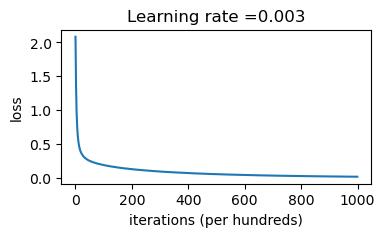

In [17]:
# GRADED CODE: multi-class classification
### START CODE HERE ###
def random_mini_batches(X, Y, mini_batch_size = 64):
    """
    Creates a list of random minibatches from (X, Y)

    Arguments:
    X -- input data, of shape (n, f^{0})
    Y -- true "label" vector, of shape (n, C)
    mini_batch_size -- size of the mini-batches, integer

    Returns:
    mini_batches -- list of synchronous (mini_batch_X, mini_batch_Y)
    """

    m = X.shape[0]                  # number of training examples
    mini_batches = []

    # Step 1: Shuffle (X, Y)
    permutation = list(np.random.permutation(m))
    shuffled_X = np.array([x_train[p, : ] for p in permutation])
    shuffled_Y = np.array([y_train[p, : ] for p in permutation])

    # Step 2 - Partition (shuffled_X, shuffled_Y).
    # Cases with a complete mini batch size only i.e each of 64 examples.
    num_complete_minibatches = math.floor(m / mini_batch_size) # number of mini batches of size mini_batch_size in your partitionning
    for k in range(0, num_complete_minibatches):
        # (approx. 2 lines)
        mini_batch_X = shuffled_X[k * mini_batch_size: (k + 1) * mini_batch_size, : ]
        mini_batch_Y = shuffled_Y[k * mini_batch_size: (k + 1) * mini_batch_size, : ]
        mini_batch = (mini_batch_X, mini_batch_Y)
        mini_batches.append(mini_batch)

    # For handling the end case (last mini-batch < mini_batch_size i.e less than 64)
    if m % mini_batch_size != 0:
        #(approx. 2 lines)
        mini_batch_X = shuffled_X[num_complete_minibatches * mini_batch_size:, : ]
        mini_batch_Y = shuffled_Y[num_complete_minibatches * mini_batch_size:, : ]
        mini_batch = (mini_batch_X, mini_batch_Y)
        mini_batches.append(mini_batch)

    return mini_batches


layers_dims = [784, 256, 64, 10]
activation_fn = ["relu", "relu", "softmax"]
learning_rate = 0.003
num_iterations = 1000
batch_size = 200
classes = 10
losses = []                         # keep track of loss
print_loss = True
print_freq = 100
loss_function = 'cross_entropy'
gamma = None
alpha = None
model = Model(layers_dims, activation_fn, loss_function, alpha=alpha, gamma=gamma)

# Loop (gradient descent)
for i in range(0, num_iterations):
    mini_batches = random_mini_batches(x_train, y_train, batch_size)
    loss = 0
    for batch in mini_batches:
        x_batch, y_batch = batch

        # forward
        AL = model.forward(x_batch)

        # compute loss
        if loss_function == 'cross_entropy':
            loss += compute_CCE_loss(AL=AL, Y=y_batch)
        elif loss_function == 'focal_loss':
            loss += compute_focal_loss(AL=AL, Y=y_batch, alpha=alpha, gamma=gamma)

        # backward
        dA_prev = model.backward(AL=AL, Y=y_batch)
        # update
        model.update(learning_rate)

    loss /= len(mini_batches)
    losses.append(loss)
    if print_loss and i % print_freq == 0:
        print ("Loss after iteration %i: %f" %(i, loss))


# plot the loss
plt.figure(figsize=(4, 2))
plt.plot(np.squeeze(losses))
plt.ylabel('loss')
plt.xlabel('iterations (per hundreds)')
plt.title("Learning rate =" + str(learning_rate))
plt.show()
### END CODE HERE ###

In [18]:
pred_train = predict(x_train, y_train, model)

Accuracy: 99.73%
f1 score for each class: [0.999094   0.99793725 0.99888018 0.9988992  0.99752617 0.99875653
 0.99652174 0.99355301 0.98634812 0.9771167 ]
f1_macro score: 0.99


In [19]:
#You can check for your validation accuracy here. (Optional)
### START CODE HERE ###
pred_val = predict(x_val, y_val, model)
### END CODE HERE ###

Accuracy: 97.33%
f1 score for each class: [0.98331078 0.98783666 0.9749861  0.96677116 0.97791318 0.96620278
 0.96969697 0.96709585 0.91079812 0.91402715]
f1_macro score: 0.96


In [20]:
pred_test = predict(X_test, None, model)
outputs["advanced_pred_test"] = pred_test

# Submit prediction

In [21]:
# sanity check
assert list(outputs.keys()) == [
    'basic_pred_test',\
    'advanced_pred_test'],\
"You're missing something, please restart the kernel and run the code from begining to the end. If the same error occurs, maybe you deleted some outputs, check the template to find the missing parts!"

In [22]:
np.save("output_bonus.npy", outputs)

In [24]:
# sanity check
submit = np.load("output_bonus.npy", allow_pickle=True).item()
for key, value in submit.items():
  print(str(key) + "： " + str(type(value)))

basic_pred_test： <class 'numpy.ndarray'>
advanced_pred_test： <class 'numpy.ndarray'>


**Notice**: We will not check the data type after "compute_focal_loss", (since you might be using focal loss in basic, then your basic_alpha wouldn't be None), so it is fine if you have different data type after "compute_focal_loss".

Expected output: <br>
<small>
linear_forward： <class 'tuple'> <br>
linear_backward： <class 'tuple'> <br>
linear_update_parameters： <class 'dict'> <br>
sigmoid： <class 'tuple'> <br>
relu： <class 'tuple'> <br>
softmax： <class 'tuple'> <br>
sigmoid_backward： <class 'numpy.ndarray'> <br>
relu_backward： <class 'numpy.ndarray'> <br>
softmax_CCE_backward： <class 'numpy.ndarray'> <br>
softmax_Focal_backward： <class 'numpy.ndarray'> <br>
model_forward_sigmoid： <class 'tuple'> <br>
model_forward_relu： <class 'tuple'> <br>
model_forward_softmax： <class 'tuple'> <br>
model_backward_sigmoid： <class 'tuple'> <br>
model_backward_relu： <class 'tuple'> <br>
model_update_parameters： <class 'dict'> <br>
compute_BCE_loss： <class 'numpy.float64'> <br>
compute_CCE_loss： <class 'numpy.float64'> <br>
compute_focal_loss： <class 'numpy.float64'> <br>
basic_pred_test： <class 'numpy.ndarray'> <br>
basic_layers_dims： <class 'list'> <br>
basic_activation_fn： <class 'list'> <br>
basic_loss_function： <class 'str'> <br>
basic_alpha： <class 'NoneType'> <br>
basic_gamma： <class 'NoneType'> <br>
basic_model_parameters： <class 'list'> <br>
advanced_pred_test： <class 'numpy.ndarray'> <br>
advanced_layers_dims： <class 'list'> <br>
advanced_activation_fn： <class 'list'> <br>
advanced_loss_function： <class 'str'> <br>
advanced_alpha： <class 'numpy.ndarray'> <br>
advanced_gamma： <class 'float'> <br>
advanced_model_parameters： <class 'list'> <br>
</small>